# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


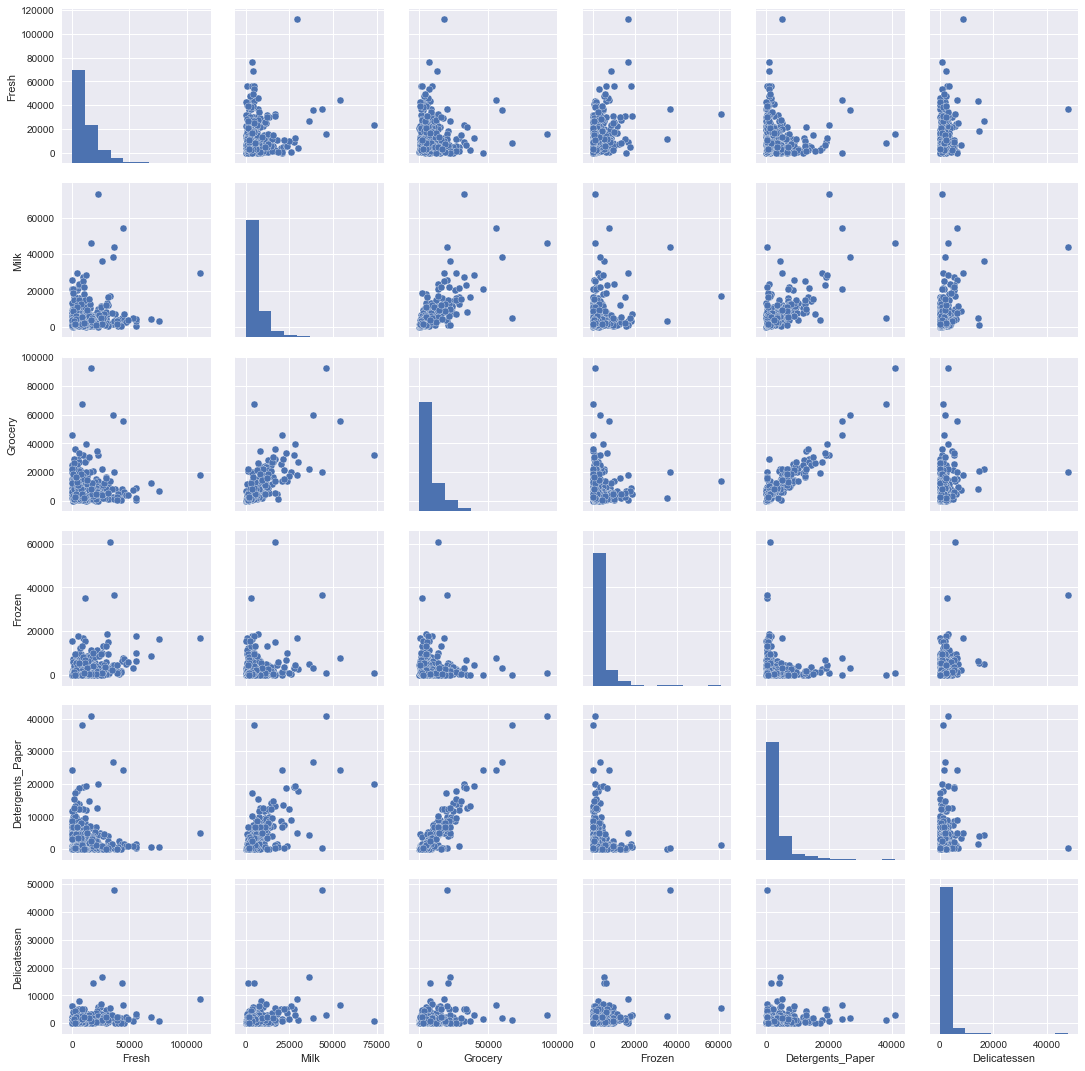

In [3]:
sns.pairplot(data)
plt.show()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2121,1601,2453,560,179,712
1,630,11095,23998,787,9529,72
2,43088,2100,2609,1200,1107,823


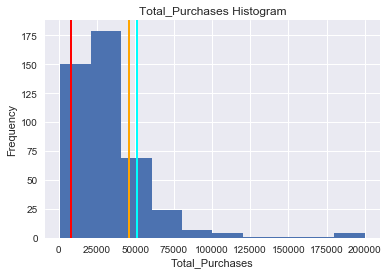

Average Distance Between Randomly Sampled Vectors: 20150.0
Chosen Indices: [(362, 43, 29)]


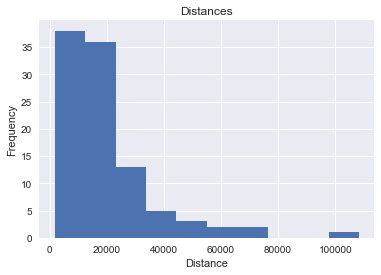

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [362,43,29]
random.seed(22)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
Total_Purchases = data.sum(axis=1)



plt.title('Total_Purchases Histogram')
plt.xlabel('Total_Purchases')
plt.ylabel('Frequency')
plt.hist(Total_Purchases)
plt.axvline(7626, color='red', linewidth=2)
plt.axvline(46111, color='orange', linewidth=2)
plt.axvline(50919, color='cyan', linewidth=2)
plt.show()


# Determining the relateness of customers by finding Euclidean distances

distances = []
for i in range(100):
    s1 = random.randrange(0,439)
    s2 = random.randrange(0,439)
    
    if s1 != s2:
        Fresh = (data['Fresh'][s1] - data['Fresh'][s2]) ** 2
        Milk = (data['Milk'][s1] - data['Milk'][s2]) ** 2
        Grocery = (data['Grocery'][s1] - data['Grocery'][s2]) ** 2
        Frozen = (data['Frozen'][s1] - data['Frozen'][s2]) ** 2
        Detergent = (data['Detergents_Paper'][s1] - data['Detergents_Paper'][s2]) ** 2
        Delicatessen = (data['Delicatessen'][s1] - data['Delicatessen'][s2]) ** 2
        
    distance = (Fresh + Milk + Grocery + Frozen + Detergent + Delicatessen) ** 0.5
    distances.append(distance)
        
plt.title('Distances') 
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.hist(distances)        
print "Average Distance Between Randomly Sampled Vectors: " + str(round(np.mean(distances)))

def distance(v1, v2):
    total = 0 
    for i in range(len(v1)):
        total += (v1[i] - v2[i]) ** 2
    total = total ** 0.5
    return total 
    
samples = []    
while True:
    a = random.randrange(0,439)
    b = random.randrange(0,439)
    c = random.randrange(0,439)
    
    if a != b and a != c and b != c:
        if distance(data.iloc[a],data.iloc[b]) > 20150 and distance(data.iloc[a],data.iloc[c]) > 20150 and distance(data.iloc[b],data.iloc[c]) > 20150:
            samples.append((a,b,c))
            break
            


print 'Chosen Indices: ' + str(samples)



In [5]:
d1 = distance(data.iloc[362],data.iloc[43])
d2 = distance(data.iloc[362],data.iloc[29])
d3 = distance(data.iloc[29],data.iloc[43])

print "Distances: " 
print ' '
print "d(362,43) =  " + str(round(d1))
print "d(362,29) =  " + str(round(d2))
print "d(29,43) = " + str(round(d3))


Distances: 
 
d(362,43) =  25386.0
d(362,29) =  40986.0
d(29,43) = 49120.0


In [6]:
# A description of the Total_Purchases variable

display(Total_Purchases.describe())

count       440.000000
mean      33226.136364
std       26356.301730
min         904.000000
25%       17448.750000
50%       27492.000000
75%       41307.500000
max      199891.000000
dtype: float64

In [7]:
# A function to generate percentile ranks for data points
def get_percentile(indices, data):
    
    for i in indices:
    
        percentiles = {"Fresh": round(stats.percentileofscore(data['Fresh'], data['Fresh'][i])),
        'Milk': round(stats.percentileofscore(data['Milk'], data['Milk'][i])),
        'Grocery': round(stats.percentileofscore(data['Grocery'], data['Grocery'][i])),
        'Frozen': round(stats.percentileofscore(data['Frozen'], data['Frozen'][i])),
        'Detergents_Paper': round(stats.percentileofscore(data['Detergents_Paper'], data['Detergents_Paper'][i])),
        'Delicatessen': round(stats.percentileofscore(data['Delicatessen'], data['Delicatessen'][i])),
        'Total_Purchases': round(stats.percentileofscore(Total_Purchases, Total_Purchases[i]))}
        print 'Percentiles for index ' + str(i) + ' ' + str(percentiles)
        print ' '
        

In [8]:
get_percentile([362,43,29], data)

Percentiles for index 362 {'Grocery': 30.0, 'Frozen': 20.0, 'Delicatessen': 40.0, 'Total_Purchases': 4.0, 'Detergents_Paper': 16.0, 'Fresh': 17.0, 'Milk': 26.0}
 
Percentiles for index 43 {'Grocery': 95.0, 'Frozen': 27.0, 'Delicatessen': 6.0, 'Total_Purchases': 79.0, 'Detergents_Paper': 93.0, 'Fresh': 8.0, 'Milk': 88.0}
 
Percentiles for index 29 {'Grocery': 33.0, 'Frozen': 43.0, 'Delicatessen': 46.0, 'Total_Purchases': 86.0, 'Detergents_Paper': 56.0, 'Fresh': 97.0, 'Milk': 34.0}
 


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
'# Created new variable for better understanding of customers'
(The series Total_Purchases is a vector that corresponds to the sum of all the categories for each customer. This is a way to measure the total size of the customer.)

The indices 362, 43, and 29 were chosen based on the following. The Euclidean distance was the metric used to measure difference between customers. A random sample of one-hundred pairs of customers with different indices was taken from the full data set and the Euclidean distance for each pair was recorded. The average Euclidean distance for this sample was 20,150.0. Three indices were chosen randomly with all of the Euclidean distances between the data points  greater than 20,150.0. The following are the distances between the customers (362,43,29), distance(customer 362, customer 43) =  25,386.0, distance(customer 362, customer 29) = 40,986.0, distance(customer 43, customer 29) = 49,120.0. 

Index 362:

Values for index 362 = {Fresh: 2121, Milk: 1601, Grocery: 2453, Frozen: 560, Detergents_Paper: 179, Delicatessen: 712}

Percentiles for index 362 = {Grocery: 30.0, Frozen: 20.0, Delicatessen: 40.0, Total_Purchases: 4.0, Detergents_Paper: 16.0, Fresh: 17.0, Milk: 26.0}

The sample with index 362 in the data set is a relatively small customer with a Total_Purchases value of 7626 which is the 4th percentile. This customer probably represents a small deli, since the Delicatessen category is in the 40th percentile. 

Index 43: 

Values for index 43 = {Fresh: 630, Milk: 11095, Grocery: 23998, Frozen: 787, Detergents_Paper: 9529, Delicatessen: 72}

Percentiles for index 43 = {'Grocery': 95.0, 'Frozen': 27.0, 'Delicatessen': 6.0, 'Total_Purchases': 79.0, 'Detergents_Paper': 93.0, 'Fresh': 8.0, 'Milk': 88.0}

The sample with index 43 is a relatively large customer with a Total_Purchases in the 79th percentile. This customer is in the 95th percentile for Grocery, and the 93rd percentile for Detergents_Paper. These large values indicate that customer may be a retailer, the fact that this customer is in the 8th percentile for Fresh indicates that the customer is more likely to be a pharmacy type retailer than a grocery store.

Index 29:

Values for index 29 = {Fresh: 43088,	Milk: 2100,	Grocery: 2609, Frozen: 1200, Detergents_Paper: 1107, Delicatessen: 823}

Percentiles for index 29 {'Grocery': 33.0, 'Frozen': 43.0, 'Delicatessen': 46.0, 'Total_Purchases': 86.0, 'Detergents_Paper': 56.0, 'Fresh': 97.0, 'Milk': 34.0}

The sample with index 29 is a relatively large customer with Total_Purchases in the 86th percentile. This customer is in the 97th percentile for Fresh and is in the 33rd percentile for Grocery. Given the high percentile ranking for Fresh, this cutomer could be a restaurant that makes its food from scratch.



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

R^2 Score: 0.64


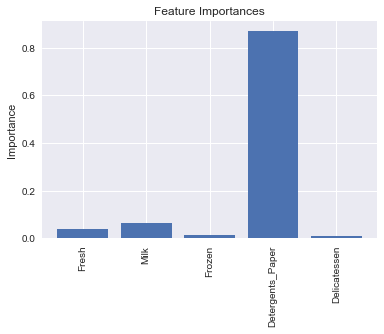

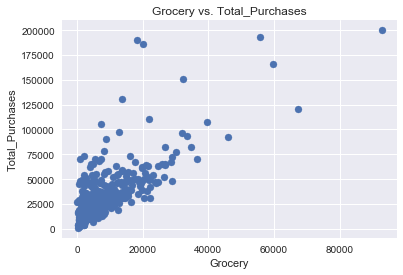

Correlation between Grocery and Total_Purchases 0.74067988021
Correlation between Grocery and Detergents_Paper 0.924640690854


In [13]:
# Import train_test_split, tree, r2_score
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
Grocery = new_data['Grocery']
new_data = new_data.drop(['Grocery'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, Grocery, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state = 22)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, y_predict)
print 'R^2 Score: ' + str(round(score, 2))

importances = regressor.feature_importances_

plt.bar([0,1,2,3,4],importances,align='center')
plt.xticks([0,1,2,3,4],list(X_train), rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

plt.scatter(Grocery, Total_Purchases)
plt.title('Grocery vs. Total_Purchases')
plt.xlabel('Grocery')
plt.ylabel('Total_Purchases')
plt.show()

print 'Correlation between Grocery and Total_Purchases ' + str(stats.pearsonr(Grocery, Total_Purchases)[0])
print 'Correlation between Grocery and Detergents_Paper ' + str(stats.pearsonr(Grocery, new_data['Detergents_Paper'])[0])
                                                                
                                                                

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I used a decision tree regressor to predict 'Grocery' using the the features ('Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen'). The R^2 score is 0.64 for predicting the testing set, which indicates the model does a fair job of predicting the target variable Grocery. The feature Detergents_Paper is the most important when it comes to predicting Grocery. A feature would be unecessary for identifying customers' spending habits if that feature was a duplicate of another feature. The Grocery variable is necessary because is it was not perfectly predicted by the decision tree regressor. Had the decision tree regressor perfectly predicted the values for Grocery, that would indicate that all of the information contained in Grocery is contained in the other features. Since this is not the case it makes sense to keep the Grocery feature in the data set. The Grocery feature has a 0.74 correlation coefficient with Total_Purchases, so knowing how much a customer spends on groceries gives is a good indicator of how much they spend in total.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


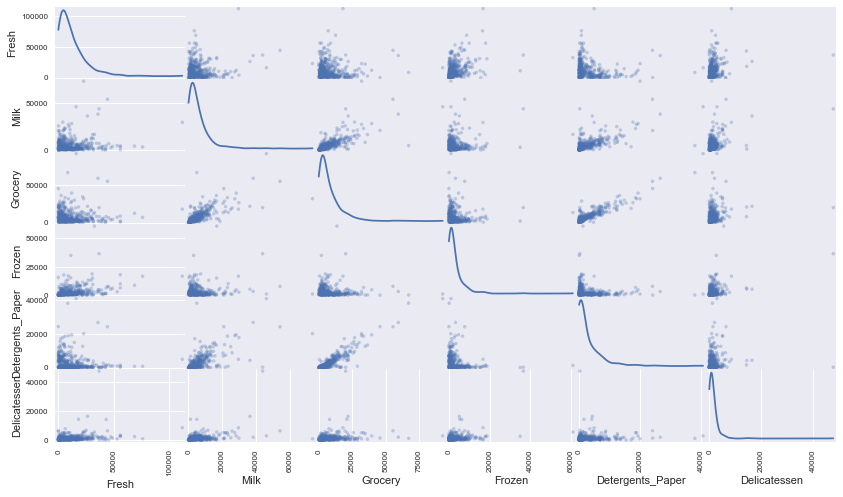

In [35]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Milk & Grocery Correlation 0.728335118154
Detergents_Paper & Grocery Correlation 0.924640690854
Fresh & Frozen Correlation 0.406368316177


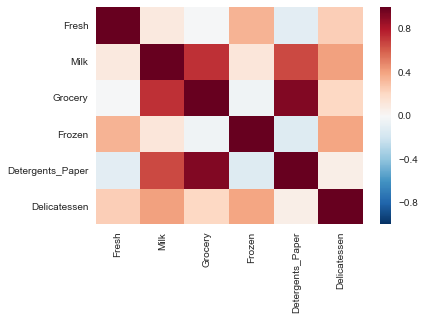

In [37]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
print 'Milk & Grocery Correlation ' + str(stats.pearsonr(data['Milk'], Grocery)[0])
print 'Detergents_Paper & Grocery Correlation ' + str(stats.pearsonr(data['Detergents_Paper'], Grocery)[0])
print 'Fresh & Frozen Correlation ' + str(stats.pearsonr(data['Milk'], data['Delicatessen'])[0])

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes there are pairs of features that do exhibit high correlation. The Grocery and Detergent_Paper features have a correlation coefficient of 0.924. When I examined the feature importance for the regression tree model, Detergent_Paper was by far the most important feature for predicting Grocery. The high level of correlation confirms what I answered for the previous question, when I stated that Detergent_Paper is the most relevant feature for predicting Grocery. The values for the Grocery and Detergent_Paper features look similar to log-normal distributions, considering that the data for both features has exclusively real positive values. Taking the natural logarithm of data that is log-normally distributed  results in normally distributed data.

Below there are three graphs showing qq-plots. 

The first graph shows a qq-plot for the Grocery values. If the Grocery values were normally distributed, the data would be a close fit to the red line. It clearly does not fit the line which indicates the Grocery data is not normally distributed. Creating a qq-plot with the natural log of the Grocery data shows a better fit with the line, indicating that the distribution of the Grocery values closely matches a log-normal distribution. The last graph is a qq-plot of the natural log of the Detergents_Paper data. The data fits the line for the most part except at the tails. The qq-plots show that the values in Grocery and Detergents are not normally distributed and are better modeled by a log normal distribution.

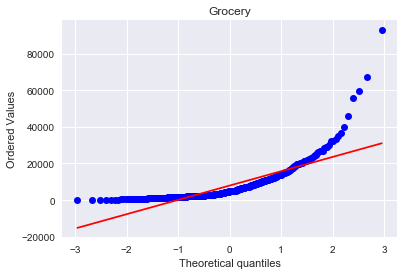

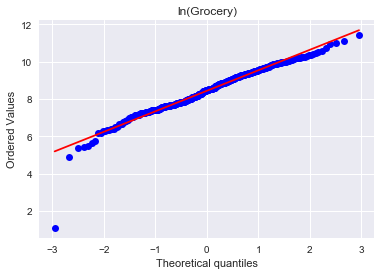

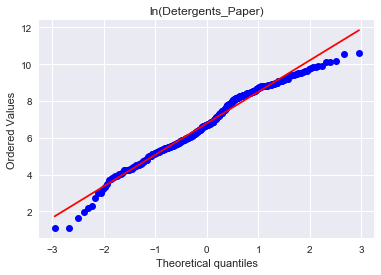

In [38]:
import scipy.stats as scs

Grocery_Log = np.log(Grocery)
Detergents_Paper_Log = np.log(data['Detergents_Paper'])

stats.probplot(Grocery, dist="norm", plot=plt)
plt.title('Grocery')
plt.show()

stats.probplot(Grocery_Log, dist="norm", plot=plt)
plt.title('ln(Grocery)')
plt.show()

stats.probplot(Detergents_Paper_Log, dist="norm", plot=plt)
plt.title('ln(Detergents_Paper)')
plt.show()



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if sys.path[0] == '':


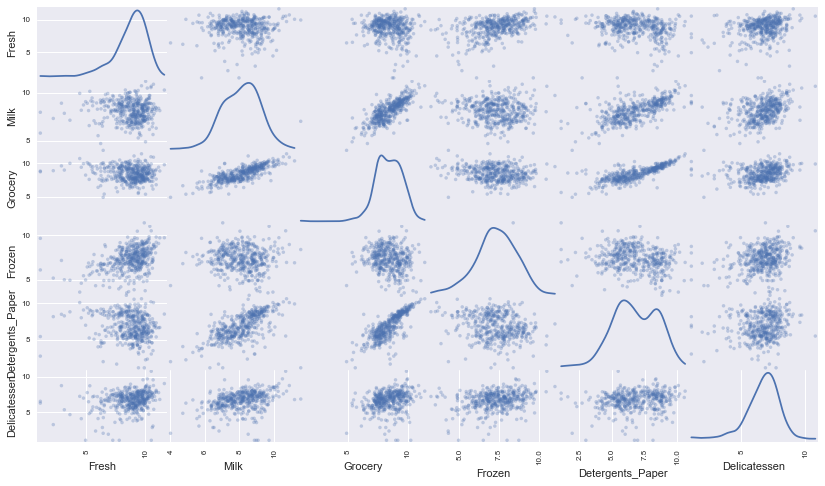

In [39]:
# TODO: Scale the data using the natural logarithm
log_data = data.copy()
log_data = np.log(log_data)

# TODO: Scale the sample data using the natural logarithm
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
log_samples = samples.copy()
log_samples = np.log(log_samples)


# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [40]:
# Display the log-transformed sample data
display(log_samples)
display(log_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.659643,7.378384,7.805067,6.327937,5.187386,6.568078
1,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
2,10.671000,7.649693,7.866722,7.090077,7.009409,6.712956


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [41]:
# For each feature find the data points with extreme high or low values
outlier = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outlier_df  = pd.concat(outlier)
print outlier_df.index.sort_values()
outliers = []
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Int64Index([ 38,  57,  65,  65,  66,  66,  75,  75,  81,  86,  95,  96,  98,
            109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183,
            184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338,
            343, 353, 355, 356, 357, 412, 420, 429, 439],
           dtype='int64')


In [42]:
# Getting a more detailed look at the outliers
get_percentile([65,66,75,128,154], log_data)
print '_____________________________________________________________________________________'
print ' '
get_percentile([38,57,81,86,95,96,98,109,137,142,145,161,171,175,183,184,187,193, 203, 
218, 233, 264, 285, 289, 304, 305, 325, 338,343, 353, 355, 356, 357, 412, 420, 429, 
439], log_data)


Percentiles for index 65 {'Grocery': 99.0, 'Frozen': 1.0, 'Delicatessen': 66.0, 'Total_Purchases': 97.0, 'Detergents_Paper': 99.0, 'Fresh': 2.0, 'Milk': 96.0}
 
Percentiles for index 66 {'Grocery': 65.0, 'Frozen': 6.0, 'Delicatessen': 3.0, 'Total_Purchases': 14.0, 'Detergents_Paper': 72.0, 'Fresh': 1.0, 'Milk': 25.0}
 
Percentiles for index 75 {'Grocery': 0.0, 'Frozen': 80.0, 'Delicatessen': 50.0, 'Total_Purchases': 49.0, 'Detergents_Paper': 0.0, 'Fresh': 83.0, 'Milk': 17.0}
 
Percentiles for index 128 {'Grocery': 44.0, 'Frozen': 5.0, 'Delicatessen': 1.0, 'Total_Purchases': 18.0, 'Detergents_Paper': 56.0, 'Fresh': 2.0, 'Milk': 83.0}
 
Percentiles for index 154 {'Grocery': 0.0, 'Frozen': 3.0, 'Delicatessen': 1.0, 'Total_Purchases': 0.0, 'Detergents_Paper': 1.0, 'Fresh': 8.0, 'Milk': 0.0}
 
_____________________________________________________________________________________
 
Percentiles for index 38 {'Grocery': 88.0, 'Frozen': 0.0, 'Delicatessen': 26.0, 'Total_Purchases': 78.0, 'Deterg

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are data points that are outliers for more than one feature, these data points are located at the indices (65, 66, 75, 128, 154) in the data frame. Data point 154 is an outlier in three cateogries, and is an extremely small customer as shown by the 0th percentile for total purchases. When I examinined the data points that have outlier values in more than one feature I concluded it would be unjustified to remove these data points. The reason being that these customers are likely to be in very distinct categories and removing them would remove valuable information about distict classes of customers. In general I would not be inclined to remove outliers unless I knew that the measurements were bad. In addition when looking at statistical descriptions of real life data there are generally observations that are outliers. These outliers can be very informative and removing them could give a false model of the data, for example if the outliers of daily stock market returns are removed this can give a false impression of the risk level of investing. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

Eigen vectors: 

[[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]
 [-0.67351166  0.03306794 -0.03218274  0.28481122 -0.21824404  0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [-0.00082162  0.72228834  0.34799325 -0.03624337 -0.56366476 -0.19536639]
 [-0.02927638  0.54303508 -0.81390826 -0.0174477   0.20244363 -0.02283197]] 

Eigen values: 

[ 4.82682393  3.01771654  1.26758903  1.04940662  0.49926069  0.25038268]


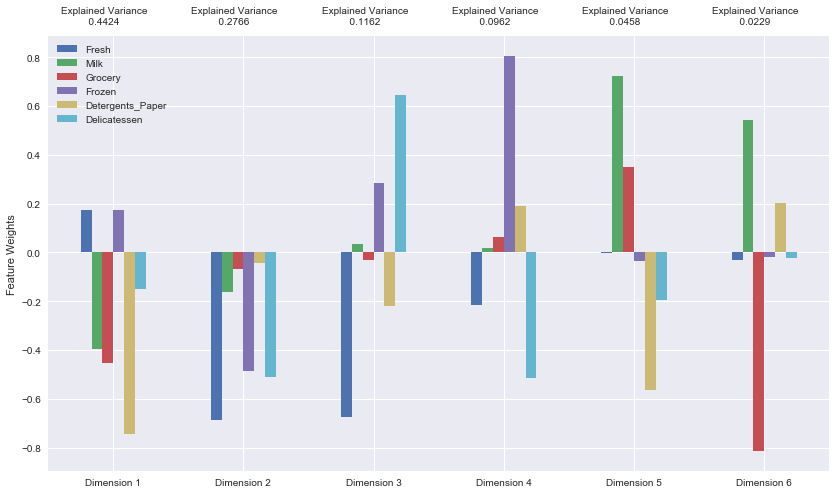

In [43]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)


# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print "Eigen vectors: \n"
print np.matrix(pca.components_), "\n"
print "Eigen values: \n"
print pca.explained_variance_




**Answer:** The first and second principal components explain (0.4424 + 0.2766) 71.9 % of the variance in the data. The first four principal components explain (0.4424 + 0.2766 + 0.1162 + 0.0962) 93.14 % of the variance in the data. 

The principal components are the eigenvectors of the covariance matrix of the data. The eigenvectors form an orthonormal basis, this means all the vectors are perpendicular to each other and their magnitudes are 1. Each eigenvector has a correspodning eigenvalue, the eigenvector that corresponds to the largest eigenvalue is the principal component that corresponds to the maximum variance of the data. The data points are projected onto the principal components, and there is a corresponding value for each component. For example in order to project a data point onto Dimension 1, a dot product is calculated with the vectors [ 0.17371704, -0.394463, -0.45436364, 0.17219603, -0.74551495 -0.1494356 ], [fresh_i - mean(Fresh), milk_i - mean(Milk), grocery_i - mean(Grocery), frozen_i - mean(Frozen), detergents_paper_i - mean(Detergents_Paper), delicatessen_i - mean(Delicatessen)]. Where i  represents the ith observation in the data. 

For component 1, the value of the projection is heavily influenced by the values for Milk, Grocery and Detergents_Paper. Component 1 is the vector [ 0.17371704, -0.394463, -0.45436364, 0.17219603, -0.74551495, -0.1494356 ]. Detergents_Paper has a weight of -0.7455149, this means that the value of the projection will be lower for values of Detergent_Paper that go higher above the mean. This can be observed when observing the sample that corresponds to index 43, the value of Detergents_Paper is higher than the other two samples and this leads to a value for component 1 that is lower than the other two samples. 

For component 2, where a data point is projected on this axis is most heavily influenced by the Fresh, Frozen and Delicatessen values of the data point. This can be seen by the value for component 2 of sample 29. This sample has a very large value for fresh, and it has the lowest value in Dimension 2. 

For component 3, where a data point is projected on this axis is most heavily influenced by the Fresh and Delicatessen values of the data point. However when values of Delicatessen and Fresh are high the position on component 3 is not greatly affected because these weights cancel each other out. This is seen by the large positive value weight of Delicatessen and the large negative weight of Fresh, for this component.

For component 4, where a data point is projected is largely influenced by its value for Frozen. The higher values of Frozen for a given data point will increase the value of the projection onto component 4. Large values for Fresh subtract from the value that a given data point will have for component 4.

RASCHKA, S. M. (2017). PYTHON MACHINE LEARNING -. S.l.: PACKT PUBLISHING LIMITED.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [44]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.4346,1.4897,0.7262,-0.8639,0.1984,-0.1586
1,-3.1384,2.6842,-0.7131,1.7855,0.5862,-0.0771
2,0.5739,-1.1438,-1.3821,-0.6141,-0.6696,0.2026


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [45]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [46]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.4346,1.4897
1,-3.1384,2.6842
2,0.5739,-1.1438


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

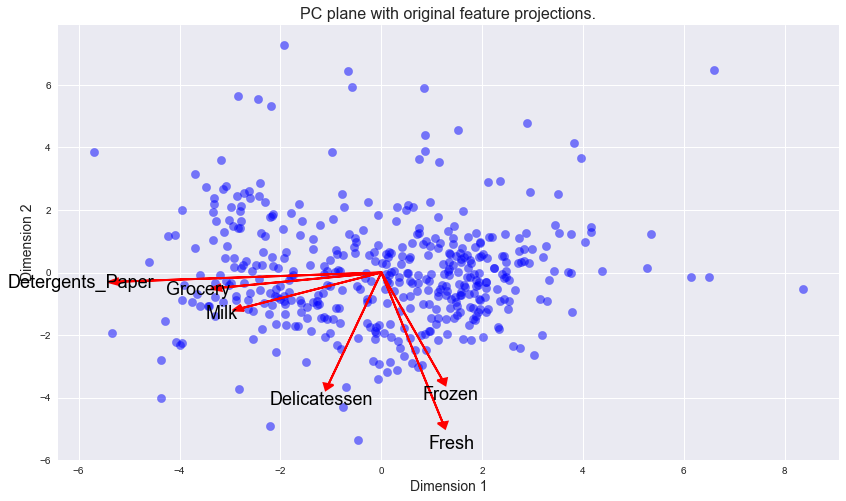

In [47]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

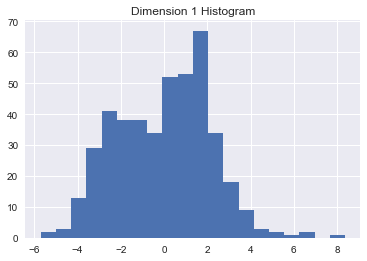

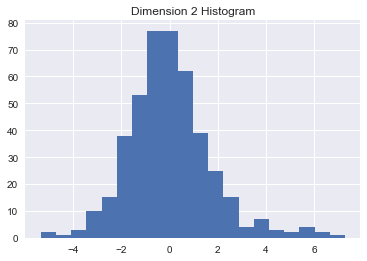

In [22]:
plt.hist(reduced_data['Dimension 1'], bins=20)
plt.title('Dimension 1 Histogram')
plt.show()

plt.hist(reduced_data['Dimension 2'], bins=20)
plt.title('Dimension 2 Histogram')
plt.show()

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

**Answer:** The K-Means clustering algorithm can effectively separate groups of data points by assigning data points to one of k-clusters that depend on the final location of k-centroids. The assignment of a data point is based on the Euclidean distance of the data point to a  given centroid. Data points closest to a given centroid are assigned to that centroid cluster, and the centroid iteratively moves to the mean of the data points assigned to it. This process continues until no further points move to different clusters, or the algorithm reaches its maximum iteration. The algorithm for K-Means clustering is simple, and scales well to large sample sizes because of its linear time complexity. Choosing a good value for k can be assisted by the elbow method. Using the elbow method, the number of clusters are compared to a value called distortion. The distortion measure is the sum of the sqaured distances of data points to their corresponding centroids. The objective is to find the minimum number of clusters before the distortion increases rapidly. In summary the advantages of K-Means clustering are that it is easy to implement, linear time complexity, easy to interpret, and techniques available for choosing cluster size such as the elbow method.

The Gaussian Mixture Model has the advantage that it finds sub-distributions within the total distribution of the data, and data points are assigned to the sub distribution that it has the maximum probability of belonging to. Each sub-distribution has its set of parameters the mean and covariance matrix, or in the case of a single variable Gaussian the mean and variance. The variance of the clusters/sub-distribtutions can determine what cluster a given point is assigned to. This assignment based on distance from the mean and covariance can better assign data points than K-Means in the circumstance that the data clusters have different covariance matrices. Probabilities for belonging to a cluster are also assigned to data points. This can be useful when the possible categories of the underlying data intersect.

The Gaussian Mixture Model is the better algorithm for this problem because from observation the clusters in the data have different variance/covariances matrices along with different centroids/means. As seen in the above scatter plot with the two principal component axes, the cluster on the right has a more dense center region than the cluster to the left as well as a diffrenet shape. Since this is the case I think that the Gaussian Mixture Model will capture this structure of the data and better assign data points to clusters/sub-distributions. When observing the Dimension 1 histogram it is possible two Gausians with different parameters generated the distribution, this further increases the rationale for using a Gaussian Mixture Model.

RASCHKA, S. M. (2017). PYTHON MACHINE LEARNING -. S.l.: PACKT PUBLISHING LIMITED.

2.1. Gaussian mixture models¶. (n.d.). Retrieved August 27, 2017, from http://scikit-learn.org/stable/modules/mixture.html

Sklearn.cluster.KMeans¶. (n.d.). Retrieved August 27, 2017, from http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [48]:
# Import Gaussian Mixture Model
from sklearn import mixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state = 20).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print 'The silhouette coefficient for 2 clusters: 0.409968'
print 'The silhouette coefficient for 3 clusters: 0.4223125'
print 'The silhouette coefficient for 4 clusters: 0.360894 '
print 'The silhouette coefficient for 5 clusters: 0.313972'

The silhouette coefficient for 2 clusters: 0.409968
The silhouette coefficient for 3 clusters: 0.4223125
The silhouette coefficient for 4 clusters: 0.360894 
The silhouette coefficient for 5 clusters: 0.313972


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I generated silhouette scores for Gaussian Mixture Models with 2,3,4,5 clusters. The Gaussian Mixture Model with 3 clusters has highest score of 0.422. However looking at the data there only appear to be 2 clusters, and the gain in score from 2 clusters to 3 clusters is minimal. So I will choose the Gaussian Mixture Model with 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

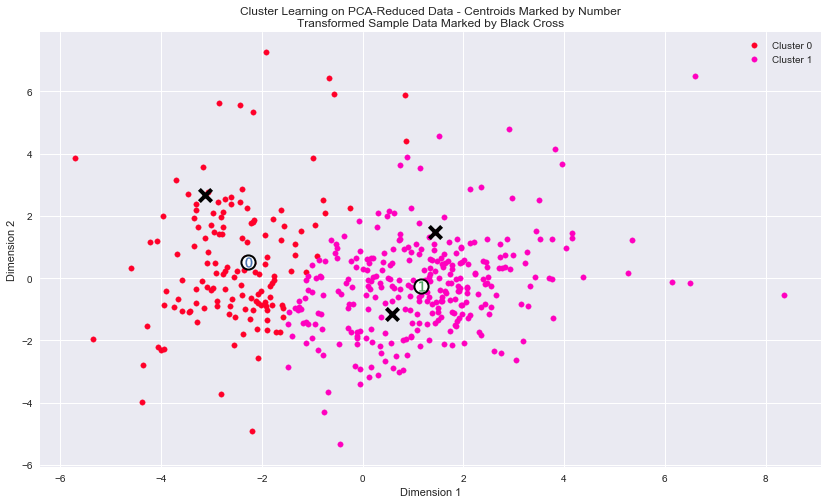

In [49]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [50]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2939.0,7576.0,12536.0,781.0,4702.0,848.0
Segment 1,9029.0,2229.0,2798.0,2051.0,380.0,754.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Segment 0 has a much higher number for Grocery purchases than Segment 1, this indicates that Segment 0 likely represents retail businesses. Most retailers sell milk as well, and given the Milk value for Segment 0 is above the 75th percentile makes it more likely that Segment 0 represents retailers. Therefore a customer assigned to Segment 0, would be classified as a retailer.

Segment 1 has a much higher value for Fresh than Segment 0, this can signal that the customers in this segment are businesses that prepare food from scratch such as restaurants and cafes. Detergents_Paper is much lower for Segment 1 than Segment 0, this is most likely due to restaurants/delis/cafes using these supplies for cleaning and not for retail purposes. Therefore a customer assigned to Segment 1 would be classified as a restaurant/cafe.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [51]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** Sample points 0,1,2 correspond to the indices in the dataset 362, 43, 29 respectively. 

I predicted the data point at index 362 (Sample point 0) represented a deli, this sample point was predicted to be in Cluster 1. I classified Cluster 1 as restaurants and cafes, the prediction that this sample point is a deli is consistent with its corresponding cluster.

I predicted the data point at index 43 (Sample point 1) represented a pharmacy/retail business. I classified Cluster 0 as retailers, which is the cluster that this data point belongs to. The initial prediction that this business is a pharmacy is consistent with it being in Cluster 0.

I predicted the data point at index 29 (Sample point 2) represented a restaurant, it was predicted to be in Cluster 1 which I classified as restaurants and cafes. 

To conclude, the intial categories that I classified the sample points to be in are consistent with the classes of Clusters that they are members of. Prior knowledge of business models was helpful with the initial classification of the sample points.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Running an A/B test for changing delivery service from 5 days a week to 3 days a week could be done in the following way. The first step would be to randomly sample customers from each segment and place them in a test group and a control group, so there are a total of four groups. Segment 0 would have a test and control group, and Segment 1 would have a test and control group, the test and control groups would be the same size. The test groups in Segment 0 and Segment 1 would have three day delivery service for a period of time and the results of the service would be recorded. The results could be measured by number of complaints, sales increase/decrease, customer losses, or a survey of how satisfied they are with the new service. The results would be compared to the control groups to see if there was a significant change in any of the performance measures, and depending on the results the distribtution company could either use or not use the new delivery strategy. It is important to note that the segments that were tested will probably respond differently to the change in service. For example the restaurants may dislike the new service because they need their ingredients to be fresh causing a need for more frequent deliveries. The retailers may be neutral to the reduction in delivery days because their inventory is mostly non-perishable and their inventory may not need to be adjusted more than three days a week. The distribution company hypothetically could decrease their delivery days for the retailers without compromising their service which could likely result in increased savings/decreased expenditures for the distribution company.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** A supervised learner could be trained on the existing customers dataset with the addition of a label of which segment the customer belongs to. A number of classification models could be trained and tested and the one with the best performance would be used. Then it would be possible classify new customers with the only information given being how much they expect to spend in each category. To summarize, a classification model would be trained and tested on the labeled customer data, a vector of the estimated product spending would be the input of the model, and the output would be which class/segment the customer belongs to.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

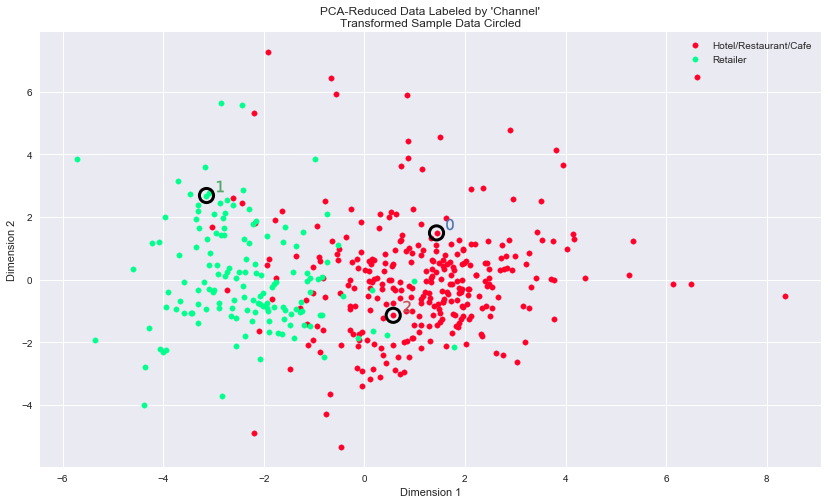

In [52]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The Gaussian Mixture Model with two clusters/distributions compares very well to the scatter plot shown above. There are two clusters in the plot above and two clusters generated by the Gaussian Mixture Model, the Gaussian mixture model also classified points with a high degree of accuracy.

As seen in the above plot there are some 'Hotels/Restaurants/Cafes' data points that are amongst many 'Retailers' data points. The 'Retailers' that are far into the terrtory of 'HoReCa' are likely hybrid businesses, classifying a pure category is difficult because of the variety of businesses that exist. However it looks like data points that have a value greater than 0 on the first principal component can be confidently classified as 'HoReCa'. Data points with a value of less than -2 on the first principal component can be confidently classified as 'Retailers'.

The classifications 'HoReCa' and 'Retailers' shown in the above scatter plot are consistent with the definitions I gave to the customer segments in question 8. The explanation I gave in question 8 validates that the average values for each cluster was very informative in regards to the true label of the customers.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.